In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


#### Missing Data Not At Random(MNAR):systematic values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [7]:
import numpy as np
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [8]:
## find the percentage of null values
df['Cabin_null'].mean()

0.7710437710437711

In [9]:
df.columns.to_frame()

,0
PassengerId,PassengerId
Survived,Survived
Pclass,Pclass
Name,Name
Sex,Sex
Age,Age
SibSp,SibSp
Parch,Parch
Ticket,Ticket
Fare,Fare


In [10]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

#### Missing At Random (MAR)

### All the techniques of handling missing values

1. Mean/Median/Mode Replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitary imputation
6. Frequent Categories imputation

### 1.Mean/Median/Mode imputation
when should we apply?
Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).we solve this by replacing the NAN with the most frequent occurance of the variables


In [11]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
# lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
def impute_nan(df,variable,median):
    df[variable + '_median'] = df[variable].fillna(median)

In [14]:
median=df.Age.median()
median

28.0

In [15]:
impute_nan(df,'Age',median)

In [16]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

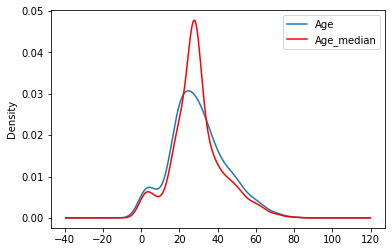

In [19]:
fig =plt.figure()
ax =fig.add_subplot(111)
df['Age'].plot(kind = 'kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages and Disadvantages of Mean/Median imputation

#### advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the orginal variance
2. Impacts correlation


### 2. RANDOM SAMPLE IMPUTATION

Aim: Random sample imputation consists of taking random observation
    from the dataset and we use this observation to replace the NAN values
    
When should it be used?
It assumes that the data are missing completely at random(MCAR)

In [20]:
import pandas as pd

In [21]:
df1 = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
df1.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [23]:
df1.isnull().mean() # percentage of the null values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
df1['Age'].isnull().sum()

177

In [25]:
df1['Age'].dropna().sample(df1['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [26]:
df1[df1['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [27]:
def impute_nan(df1,variable,median):
    df1[variable + '_median'] = df1[variable].fillna(median)
    df1[variable+"_random"] = df1[variable]
    # it will have the random sample to fill the na
    random_sample =   df1['Age'].dropna().sample(df1[variable].isnull().sum(),random_state=0)
    
    ## pandas need to have same index in oreder to merge the dataset
    random_sample.index=df1[df1[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [28]:
median = df1.Age.median()

In [29]:
median

28.0

In [30]:
impute_nan(df1,'Age',median)

In [31]:
df1.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

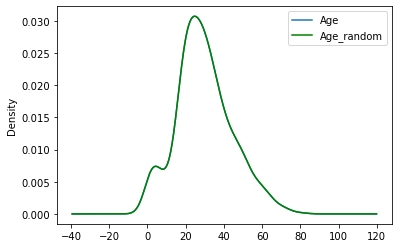

In [33]:
fig =plt.figure()
ax =fig.add_subplot(111)
df1['Age'].plot(kind = 'kde',ax=ax)
df1.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages
1. Easy to implement
2. There is less distortion in variance

## Disadvantages
1. Every situation randomness won't work


## 3. CAPTURING NAN VALUES WITH A NEW FEATURES 

It works well if the data are not missing completely at random


In [34]:
df2 = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [35]:
df2['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [36]:
df2.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [37]:
df2.Age.median()

28.0

In [38]:
df2['Age'].fillna(df.Age.median(),inplace=True)

In [39]:
df2.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages
 1. Easy to implement
 2. Captures the importance of missing values

## Disadvantages
 1 . Creating Additional Features(Curse of Dimensionality)

## 4. END OF DISTRIBUTION IMPUTATION

In [40]:
df4 = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

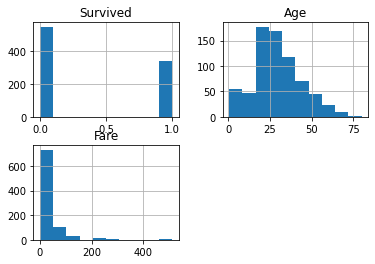

In [41]:
df4.hist()

 In this will take the far end of the distribution value 

In [42]:
df4.Age.mean()

29.69911764705882

In [43]:
extreme = df4.Age.mean()+3*df4.Age.std() # the value is end of the distribution after 3rd quartile
extreme

73.27860964406095

C:\Users\sanug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

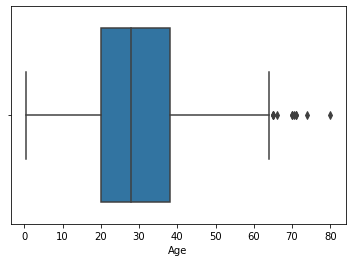

In [44]:
import seaborn as sns
sns.boxplot('Age',data=df4)

In [45]:
def impute_nan(df4,variable,median,extreme):
    df4[variable+'_end_distribution'] = df4[variable].fillna(extreme)
    df4[variable].fillna(median,inplace = True)

In [46]:
impute_nan(df4,'Age',df4.Age.median(),extreme)

In [47]:
df4.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

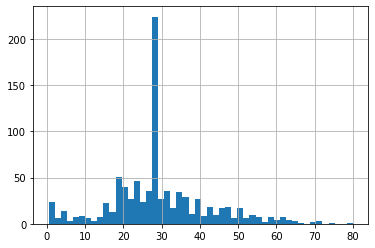

In [48]:
df4['Age'].hist(bins=50)

<AxesSubplot:>

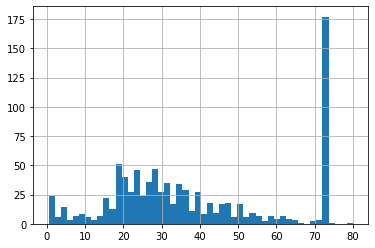

In [49]:
df4['Age_end_distribution'].hist(bins=50)

C:\Users\sanug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

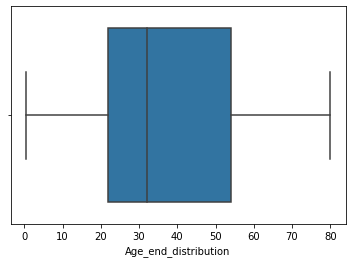

In [50]:
sns.boxplot('Age_end_distribution',data=df4)
# if we obsereve now there is no outliers

### Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one

### Disadvantages
 1. Distorts the original distribution of the variable
 2. if the number of NA is big, it will mask true outliers in the distribution
 3. if the number of NA is small,the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering

# 5. ARBITRARY VALUE IMPUTATION

It consists of replacing NAN by an arbitrary value

In [51]:
import pandas as pd

In [52]:
df5= pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
def impute_nan(df5,variable):
    df[variable+'zeros']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [54]:
### Arbitrary values
#### 1. It should be more frequently present
#-----------SKIPPED NOT IMPORTANT---------

### HANDLING CATEGORICAL MISSING VALUES

### 1.FREQUENT CATEGORY IMPUTATION

In [55]:
dff = pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
dff.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [56]:
dff.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [57]:
dff.isnull().mean()*100

BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
SalePrice       0.000000
dtype: float64

In [58]:
## compute the frequency with every feature

In [59]:
dff['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [60]:
dff.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

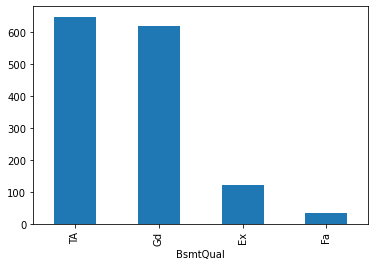

In [61]:
dff.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [62]:
dff['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:>

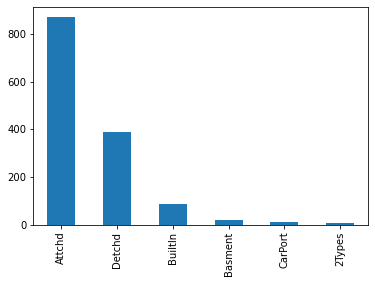

In [63]:
dff['GarageType'].value_counts().plot.bar()

In [64]:
dff['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

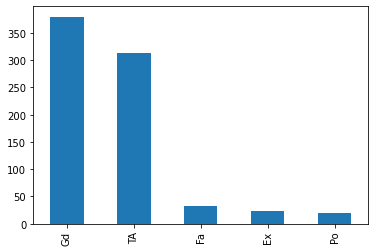

In [65]:
dff['FireplaceQu'].value_counts().plot.bar()

In [66]:
dff['GarageType'].value_counts().index[0]

'Attchd'

In [67]:
def impute_nan(dff,variable):
    most_frequent_category = dff[variable].value_counts().index[0]
    dff[variable].fillna(most_frequent_category,inplace= True)

In [68]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(dff,features)

In [70]:
dff.isnull().sum() # we replaced all nan values with most frequent index

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [74]:
dff.GarageType.mode()[0] # we can also use mode to replace

'Attchd'

### Advantages
1.Easy to implement
### Disadvantages
1. since we are using the more frequent labels,it may use them in an over represented way, if there are many NANs.
2. it distorts the relationship of the most frequent label

## Adding a variable to capture NAN

In [78]:
df = pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [79]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [80]:
frequent = df['BsmtQual'].mode()[0]

In [82]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [83]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [84]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace = True)

In [85]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#****
### suppose if you have more frequent categories, we just replace NAN with a new category

In [87]:
df = pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [88]:
def impute_nan(df,variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull(),'missing',df[variable])

In [89]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [90]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [91]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,missing,Attchd


# Feature Engineering - Handling Categorical Features

In [92]:
import pandas as pd

# 1. One Hot Encoading

In [93]:
df = pd.read_csv('train.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [96]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [97]:
df = pd.read_csv('train.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [98]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [100]:
df.dropna(inplace=True)

In [102]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [104]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# One Hot Encoding with many categories in a feature

In [106]:
df = pd.read_csv('benz.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [108]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
am     18
i      18
aq     18
u      17
l      16
aw     16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [109]:
len(df['X0'].value_counts())

47

In [111]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [113]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [114]:
lst_10 =df.X1.value_counts().sort_values(ascending=False).head(10).index

In [116]:
lst_10=list(lst_10)

In [117]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [118]:
for categories in lst_10:
    df[categories]=np.where(df['X1']== categories,1,0)

In [123]:
lst_10.append('X1')

In [126]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
